In [29]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import importlib
import utils

importlib.reload(utils)

from utils import plotStuff

In [30]:
binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchLockOMP.restype = utils.benchData
binary.benchCriticalOMP.restype = utils.benchData
binary.benchTAS.restype = utils.benchData
binary.benchTATAS.restype = utils.benchData
binary.benchTicket.restype = utils.benchData
binary.benchArray.restype = utils.benchData

AttributeError: build/sharedLibrary.so: undefined symbol: benchArray

In [ ]:
maxThreads = 12
total_acqs = 1000
bench_iters = 1000

threadNum = [i for i in range(2, maxThreads)]
bmListLockOMP = {threads: [binary.benchLockOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTAS = {threads: [binary.benchTAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTATAS = {threads: [binary.benchTATAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTicket = {threads: [binary.benchTicket(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListArray = {threads: [binary.benchArray(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}

df_LockOMP = utils.dataframeBuilder(bmListLockOMP)
df_CriticalOMP = utils.dataframeBuilder(bmListCriticalOMP)
df_TAS = utils.dataframeBuilder(bmListTAS)
df_TATAS = utils.dataframeBuilder(bmListTATAS)
df_Ticket = utils.dataframeBuilder(bmListTicket)
df_array = utils.dataframeBuilder(bmListArray)

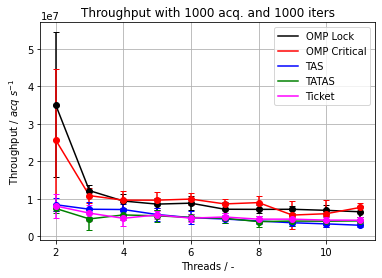

In [ ]:
utils.plotStuff("threads", "TP", "OMP Lock", df_LockOMP, "black")
utils.plotStuff("threads", "TP", "OMP Critical", df_CriticalOMP, color = "red")
utils.plotStuff("threads", "TP", "TAS", df_TAS, color = "blue")
utils.plotStuff("threads", "TP", "TATAS", df_TATAS, color = "green")
utils.plotStuff("threads", "TP", "Ticket", df_Ticket, color = "magenta")
utils.plotStuff("threads", "TP", "Array", df_Array, color = "yellow")

plt.title("Throughput with 1000 acq. and 1000 iters")
plt.xlabel("Threads / -")
plt.ylabel("Throughput / $acq$ $s^{-1}$")
plt.legend()
plt.grid()